In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import os
from glob import glob
from tqdm import *
%matplotlib inline

In [28]:
data = glob('/Users/jerife/data/mnist_png/training/*/*')
test_data = glob('/Users/jerife/data/mnist_png/testing/*/*')
len(data)

60000

In [3]:
def get_data_length(label):
    list_set=[]
    for num in label:
        index = os.listdir('/Users/jerife/data/mnist_png/training/'+num)
        list_set.append(len(index))
        print(num,"  ",len(index))
    return list_set

In [4]:
def get_once_label():
    label_index = os.listdir('/Users/jerife/data/mnist_png/training/')
    label_index.pop(0)
    return label_index

In [5]:
data_label = get_once_label()
data_label

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [6]:
data_set_length = get_data_length(data_label)

9    5949
0    5923
7    6265
6    5918
1    6742
8    5851
4    5842
3    6131
2    5958
5    5421


In [7]:
len(data_set_length)

10

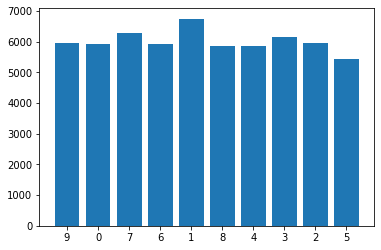

In [8]:
plt.bar(data_label,data_set_length)
plt.show()

In [9]:
def get_label(data):
    label = data.split("ing/")[1].split("/")[0]
    return int(label)

In [17]:
len(data)

60000

In [29]:
label = list(map(lambda x: get_label(x)*1,data))
test_label = list(map(lambda x: get_label(x)*1,test_data))

In [31]:
print(len(label),len(test_label))

60000 10000


In [20]:
path = data[0]
path

'/Users/jerife/data/mnist_png/training/9/36655.png'

In [21]:
path_label = get_label(path)
path_label

9

In [22]:
label = get_label(data)

AttributeError: 'list' object has no attribute 'split'

In [23]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [24]:
path_image=read_image(path)
path_image

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],

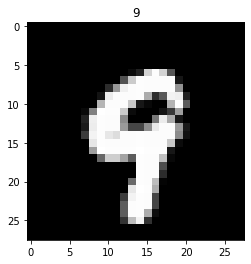

In [25]:
plt.imshow(path_image[:,:,0],'gray')
plt.title(path_label)
plt.show()

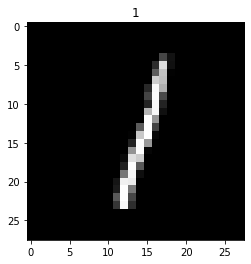

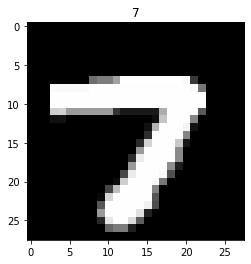

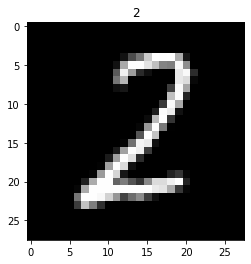

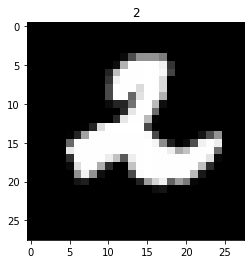

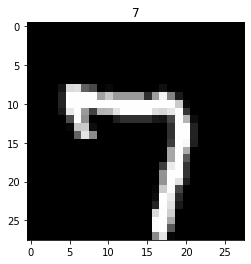

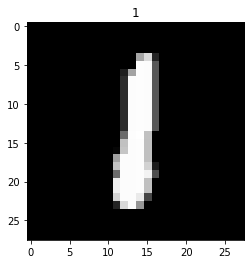

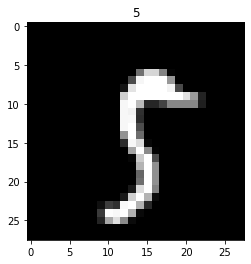

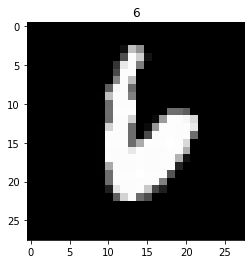

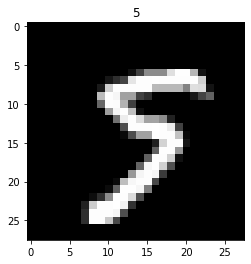

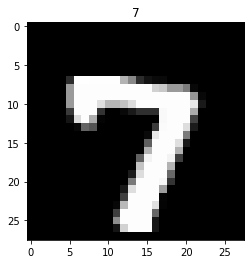

In [26]:
for i in range(10):
    r=np.random.randint(1,60000)
    plt.imshow(read_image(data[r])[:,:,0],'gray')
    plt.title(get_label(data[r]))
    plt.show()

In [27]:
#DataGenerator
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    width_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1/255.
)

In [35]:
train_dir = '/Users/jerife/data/mnist_png/training'
test_dir = '/Users/jerife/data/mnist_png/testing'

In [36]:
train_genrator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)
test_genrator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [38]:
inputs = layers.Input(shape=(28,28,1))

net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#fullyConected
net = layers.Flatten()(net)
net = layers.Dense(500)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.BatchNormalization()(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name ='CNN')

In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
history = model.fit_generator(
    train_genrator,
    steps_per_epoch = len(train_genrator),
    epochs=3,
    validation_data=test_genrator,
    validation_steps=len(test_genrator)
)

/Users/jerife/PycharmProjects/JupyterNotebook/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
1875/1875 [==============================] - 69s 36ms/step - loss: 1.7340 - accuracy: 0.4948 - val_loss: 0.6487 - val_accuracy: 0.7911

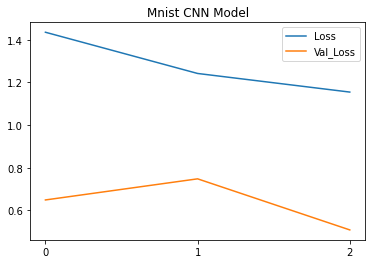

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Mnist CNN Model")
plt.xlabel = 'Epochs'
plt.xticks(range(0,3))
plt.ylabel = 'Loss',
plt.legend(['Loss','Val_Loss'])